In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/series/cv-foundations':
  os.chdir(r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/series/cv-foundations')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/zipimport.py": 1708118050.3201988, "/home/hasan/miniconda3/lib/python3.12/codecs.py": 1708118050.0762022, "/home/hasan/miniconda3/lib/python3.12/encodings/aliases.py": 1708118050.5121963, "/home/hasan/miniconda3/lib/python3.12/encodings/__init__.py": 1708118050.6041949, "/home/hasan/miniconda3/lib/python3.12/encodings/utf_8.py": 1708118050.7081935, "/home/hasan/miniconda3/lib/python3.12/abc.py": 1708118050.0562024, "/home/hasan/miniconda3/lib/python3.12/io.py": 1708118050.1442013, "/home/hasan/miniconda3/lib/python3.12/stat.py": 1708118050.2561998, "/home/hasan/miniconda3/lib/python3.12/_collections_abc.py": 1708118050.084202, "/home/hasan/miniconda3/lib/python3.12/genericpath.py": 1708118050.1242015, "/home/hasan/miniconda3/lib/python3.12/posixpath.py": 1708118050.19220

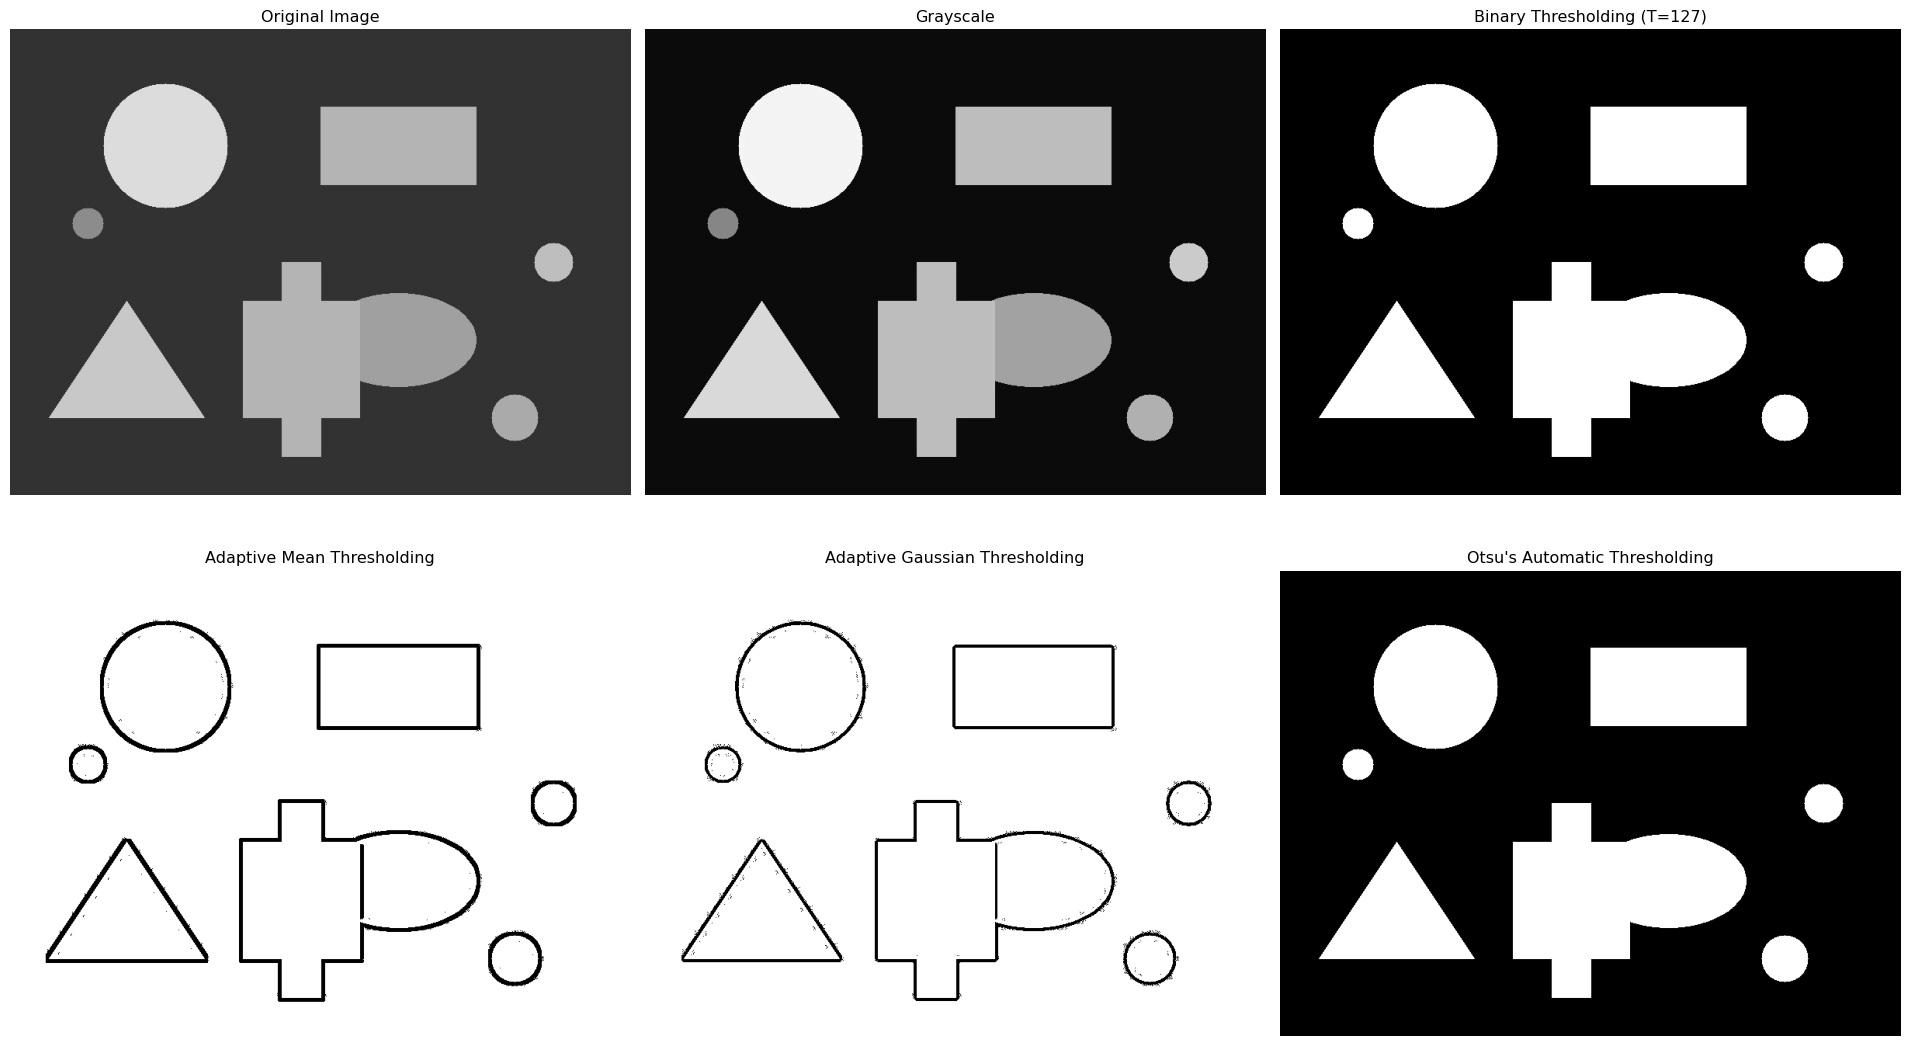

🎯 Thresholding Results:
- Binary: Simple threshold at 127
- Adaptive Mean: Local neighborhood average
- Adaptive Gaussian: Weighted neighborhood average
- Otsu: Automatically found optimal threshold


In [2]:
#| eval: true
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load our synthetic segmentation demo image
img = cv2.imread('images/segmentation-demo.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Simple thresholding
def apply_thresholding(image, threshold_value=127):
    """Apply different thresholding techniques"""
    
    # Simple binary thresholding
    _, binary = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    
    # Adaptive thresholding (handles varying lighting)
    adaptive_mean = cv2.adaptiveThreshold(
        image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
    )
    
    adaptive_gaussian = cv2.adaptiveThreshold(
        image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )
    
    # Otsu's thresholding (automatically finds best threshold)
    _, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return binary, adaptive_mean, adaptive_gaussian, otsu

# Apply different thresholding techniques
binary, adaptive_mean, adaptive_gaussian, otsu = apply_thresholding(gray)

# Display results
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(binary, cmap='gray')
plt.title("Binary Thresholding (T=127)")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(adaptive_mean, cmap='gray')
plt.title("Adaptive Mean Thresholding")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(adaptive_gaussian, cmap='gray')
plt.title("Adaptive Gaussian Thresholding")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(otsu, cmap='gray')
plt.title("Otsu's Automatic Thresholding")
plt.axis('off')

plt.tight_layout()
plt.show()

print("🎯 Thresholding Results:")
print(f"- Binary: Simple threshold at 127")
print(f"- Adaptive Mean: Local neighborhood average")
print(f"- Adaptive Gaussian: Weighted neighborhood average")
print(f"- Otsu: Automatically found optimal threshold")

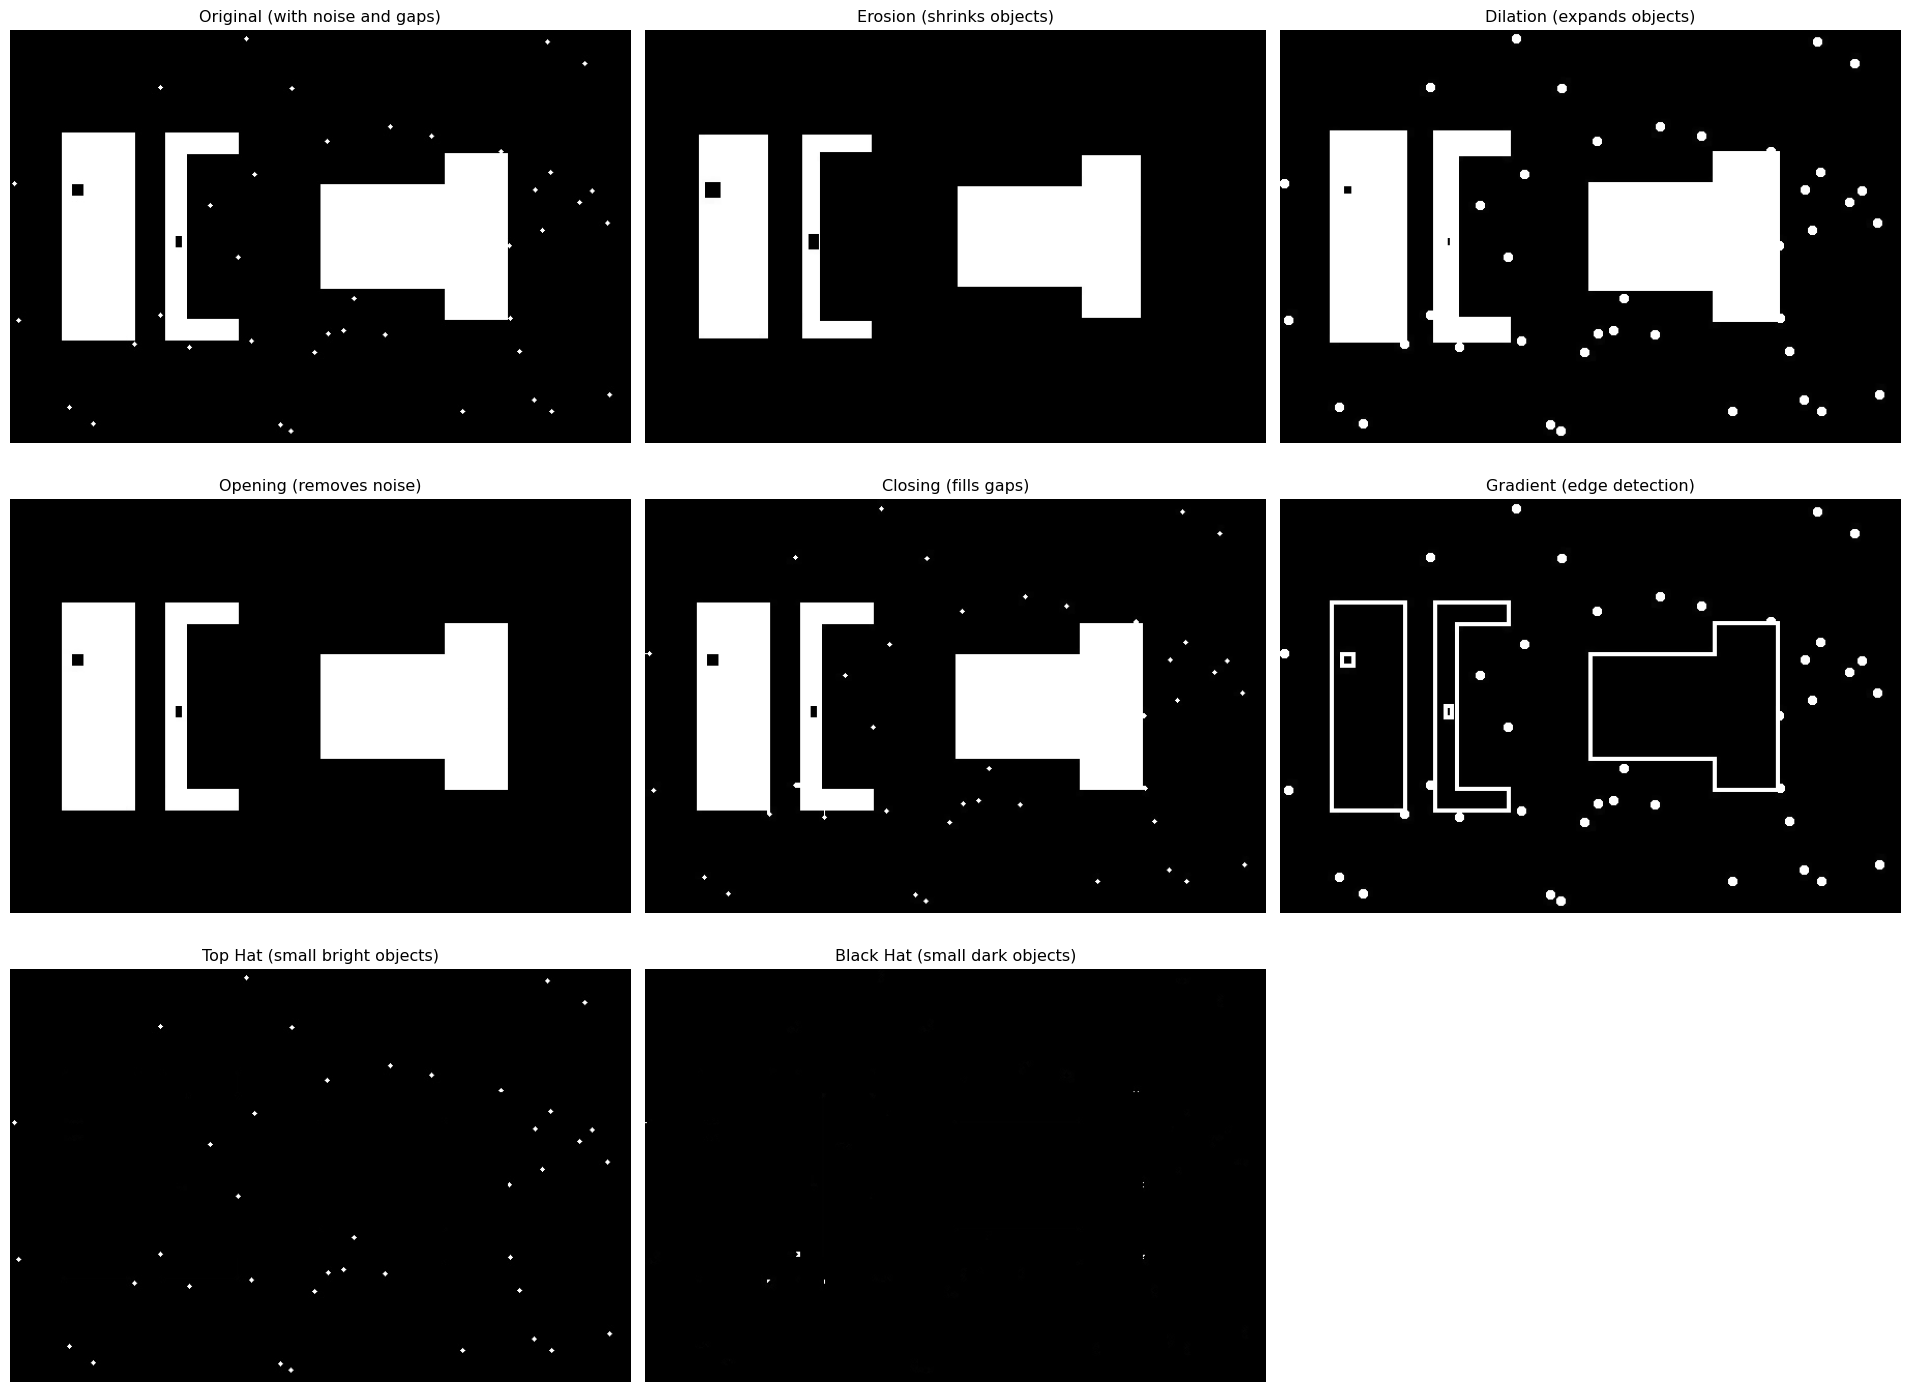

🔧 Morphological Operations Explained:
- Erosion: Shrinks white regions (removes noise)
- Dilation: Expands white regions (fills small gaps)
- Opening: Erosion followed by dilation (removes small noise)
- Closing: Dilation followed by erosion (fills gaps in objects)
- Gradient: Difference between dilation and erosion (edges)
- Top Hat: Original minus opening (small bright features)
- Black Hat: Closing minus original (small dark features)


In [3]:
#| eval: true
# Load our morphological demo image (designed for these operations)
morph_img = cv2.imread('images/morphological-demo.jpg', cv2.IMREAD_GRAYSCALE)

def demonstrate_morphological_operations(image):
    """Show the four basic morphological operations"""
    
    # Define structuring element (kernel)
    kernel = np.ones((5, 5), np.uint8)
    
    # Basic operations
    erosion = cv2.erode(image, kernel, iterations=1)
    dilation = cv2.dilate(image, kernel, iterations=1)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    
    # Advanced operations
    gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
    tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
    blackhat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)
    
    return erosion, dilation, opening, closing, gradient, tophat, blackhat

# Apply morphological operations
erosion, dilation, opening, closing, gradient, tophat, blackhat = demonstrate_morphological_operations(morph_img)

# Display results
plt.figure(figsize=(20, 15))

plt.subplot(3, 3, 1)
plt.imshow(morph_img, cmap='gray')
plt.title("Original (with noise and gaps)")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(erosion, cmap='gray')
plt.title("Erosion (shrinks objects)")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(dilation, cmap='gray')
plt.title("Dilation (expands objects)")
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(opening, cmap='gray')
plt.title("Opening (removes noise)")
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(closing, cmap='gray')
plt.title("Closing (fills gaps)")
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(gradient, cmap='gray')
plt.title("Gradient (edge detection)")
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(tophat, cmap='gray')
plt.title("Top Hat (small bright objects)")
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(blackhat, cmap='gray')
plt.title("Black Hat (small dark objects)")
plt.axis('off')

plt.tight_layout()
plt.show()

print("🔧 Morphological Operations Explained:")
print("- Erosion: Shrinks white regions (removes noise)")
print("- Dilation: Expands white regions (fills small gaps)")
print("- Opening: Erosion followed by dilation (removes small noise)")
print("- Closing: Dilation followed by erosion (fills gaps in objects)")
print("- Gradient: Difference between dilation and erosion (edges)")
print("- Top Hat: Original minus opening (small bright features)")
print("- Black Hat: Closing minus original (small dark features)")

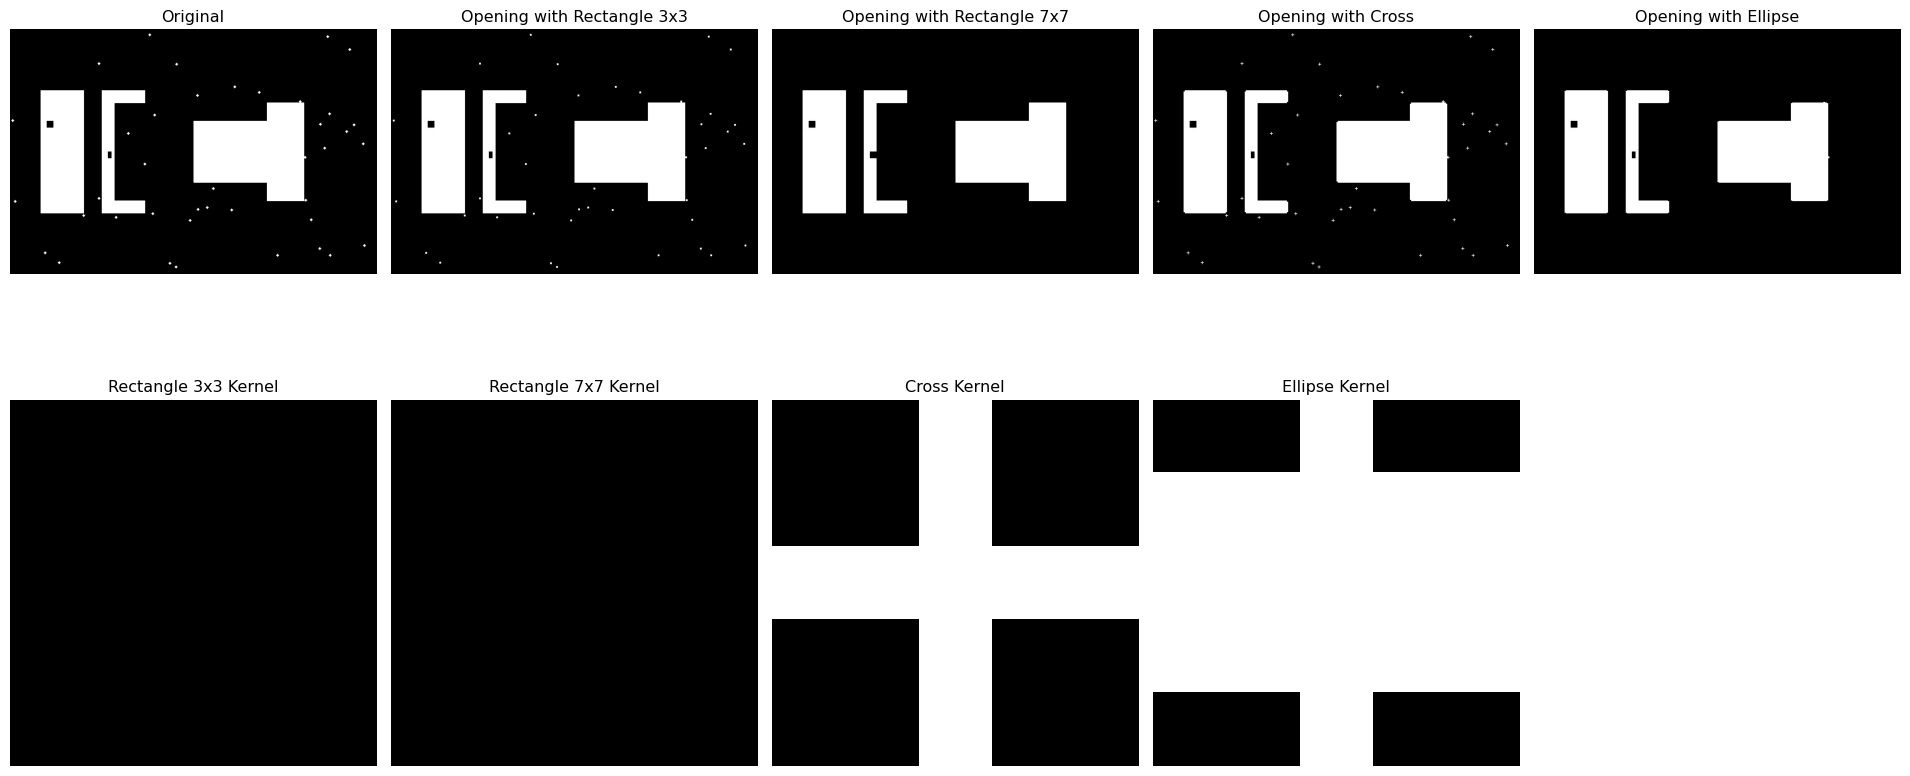

🎯 Kernel Shape Effects:
- Rectangle: General-purpose, preserves rectangular features
- Cross: Connects horizontal/vertical elements
- Ellipse: Preserves circular/curved features
- Size matters: Larger kernels = stronger effects


In [4]:
#| eval: true
# Different kernel shapes for different effects
def show_kernel_effects():
    """Demonstrate how different kernels affect morphological operations"""
    
    # Create different kernels
    kernels = {
        'Rectangle 3x3': np.ones((3, 3), np.uint8),
        'Rectangle 7x7': np.ones((7, 7), np.uint8),
        'Cross': cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5)),
        'Ellipse': cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    }
    
    results = {}
    for name, kernel in kernels.items():
        # Apply opening operation with different kernels
        result = cv2.morphologyEx(morph_img, cv2.MORPH_OPEN, kernel)
        results[name] = result
    
    return kernels, results

kernels, kernel_results = show_kernel_effects()

# Visualize kernel effects
plt.figure(figsize=(20, 10))

plt.subplot(2, 5, 1)
plt.imshow(morph_img, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, (name, result) in enumerate(kernel_results.items(), 2):
    plt.subplot(2, 5, i)
    plt.imshow(result, cmap='gray')
    plt.title(f"Opening with {name}")
    plt.axis('off')

# Show the kernels themselves
for i, (name, kernel) in enumerate(kernels.items(), 6):
    plt.subplot(2, 5, i)
    plt.imshow(kernel * 255, cmap='gray')
    plt.title(f"{name} Kernel")
    plt.axis('off')

plt.tight_layout()
plt.show()

print("🎯 Kernel Shape Effects:")
print("- Rectangle: General-purpose, preserves rectangular features")
print("- Cross: Connects horizontal/vertical elements")
print("- Ellipse: Preserves circular/curved features")
print("- Size matters: Larger kernels = stronger effects")

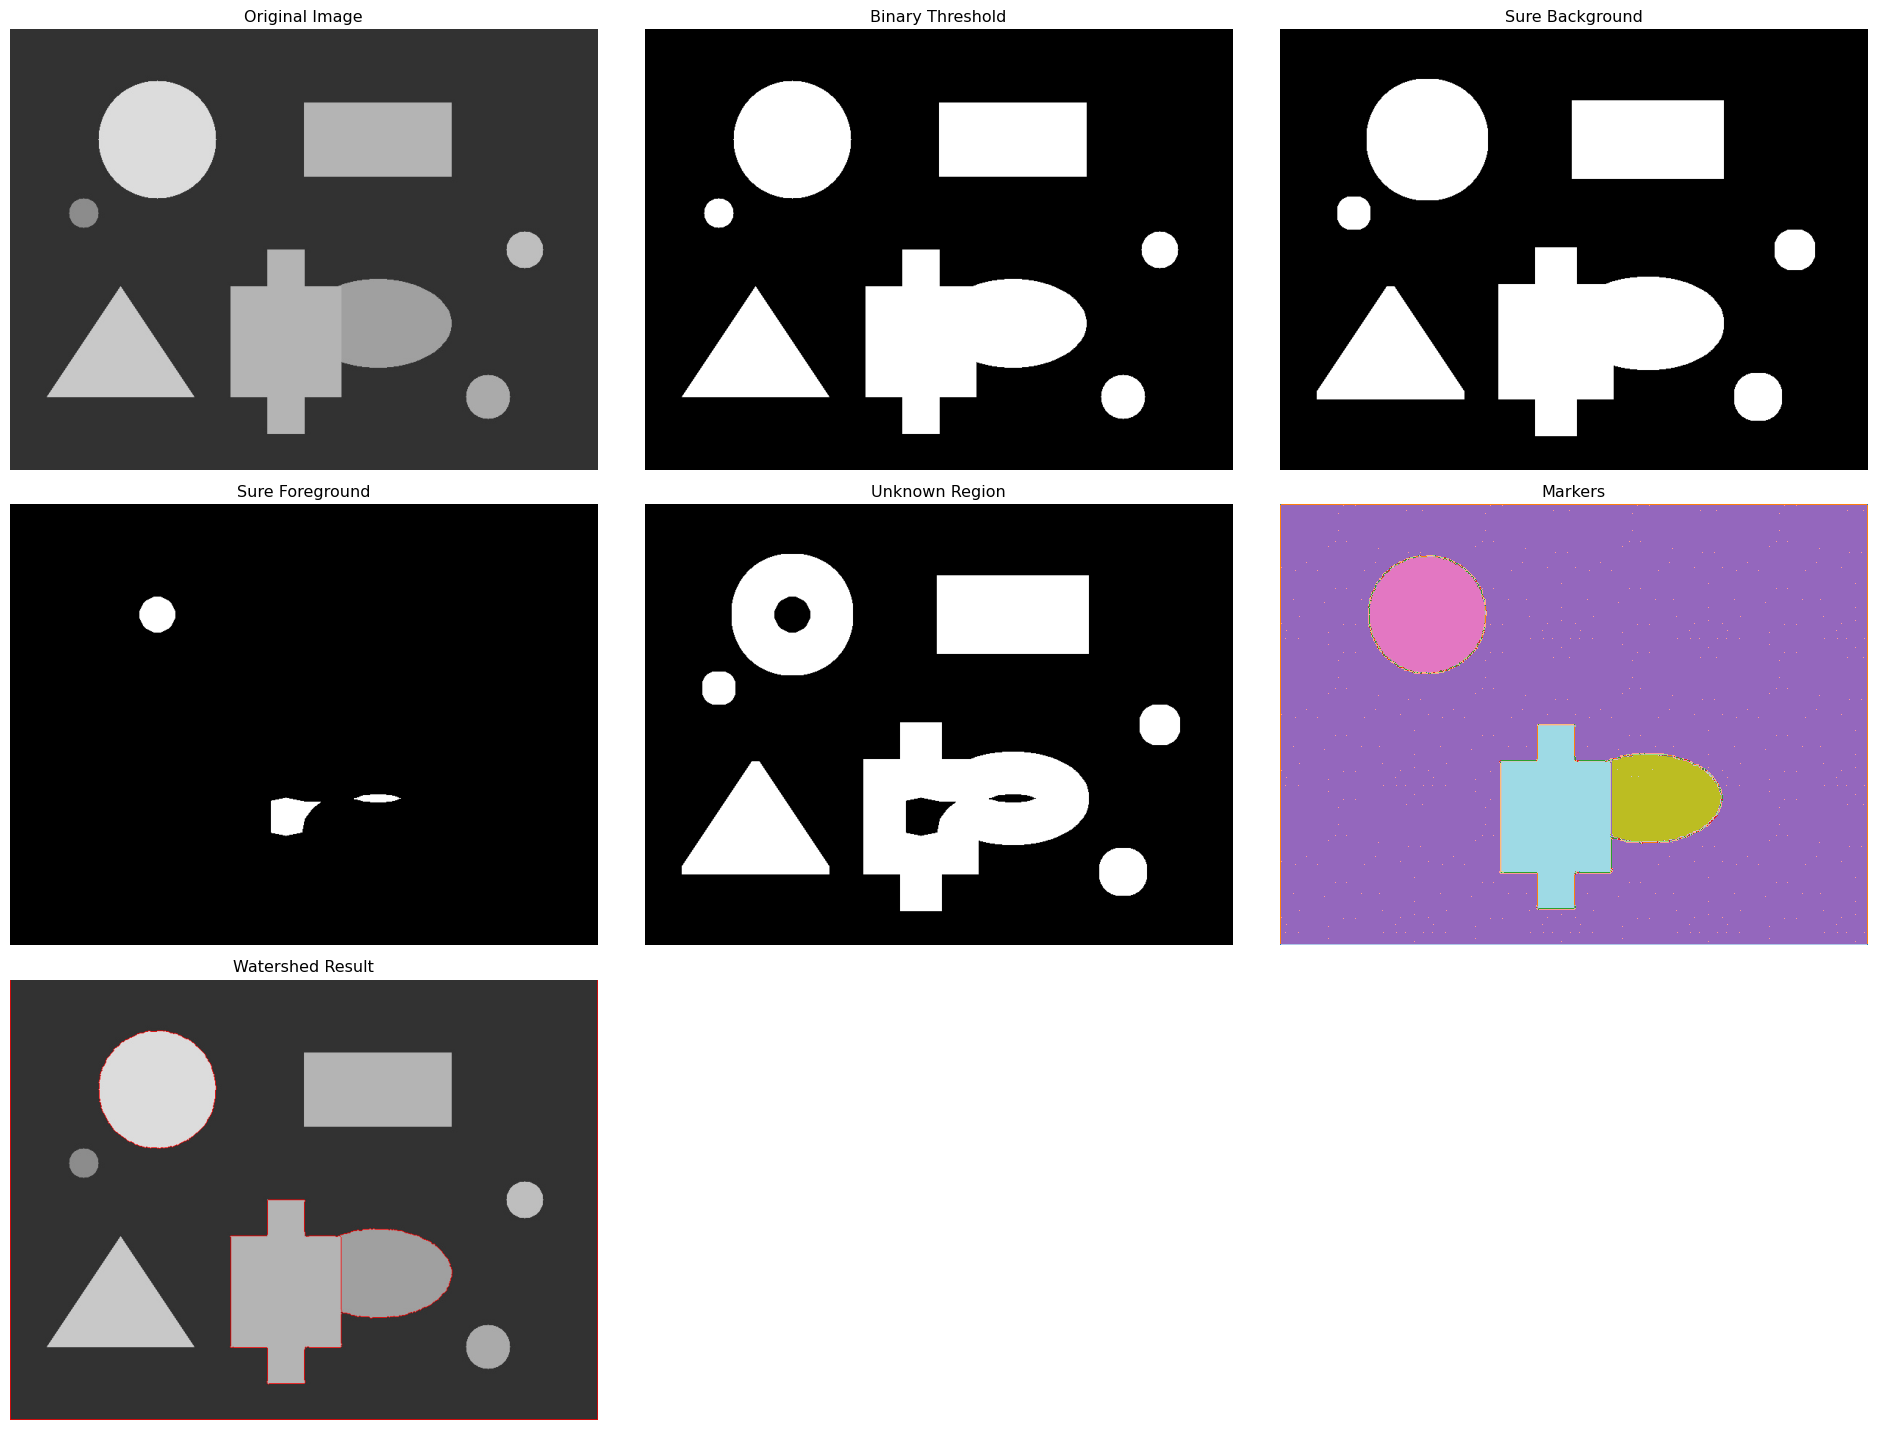

🌊 Watershed Segmentation Steps:
1. Threshold to get binary image
2. Find sure background (dilated objects)
3. Find sure foreground (distance transform peaks)
4. Mark unknown regions between sure areas
5. Apply watershed algorithm to flood from markers
6. Red lines show the watershed boundaries!


In [5]:
#| eval: true
from scipy import ndimage
from skimage.segmentation import watershed

def watershed_segmentation(image):
    """Apply watershed segmentation to separate touching objects"""
    
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image
    
    # Apply threshold to get binary image
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Remove noise with morphological opening
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    
    # Find sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    
    # Find sure foreground area using distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    
    # Find unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    # Marker labelling
    _, markers = cv2.connectedComponents(sure_fg)
    
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1
    
    # Mark the region of unknown with zero
    markers[unknown == 255] = 0
    
    # Apply watershed
    if len(image.shape) == 3:
        markers = cv2.watershed(image, markers)
        result = image.copy()
        result[markers == -1] = [255, 0, 0]  # Mark boundaries in red
    else:
        # For grayscale, create a color version for visualization
        result = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
        markers_watershed = cv2.watershed(result, markers)
        result[markers_watershed == -1] = [255, 0, 0]
    
    return binary, sure_bg, sure_fg, unknown, markers, result

# Apply watershed to our demo image
binary, sure_bg, sure_fg, unknown, markers, watershed_result = watershed_segmentation(img_rgb)

# Display watershed process
plt.figure(figsize=(20, 15))

plt.subplot(3, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(binary, cmap='gray')
plt.title("Binary Threshold")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(sure_bg, cmap='gray')
plt.title("Sure Background")
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(sure_fg, cmap='gray')
plt.title("Sure Foreground")
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(unknown, cmap='gray')
plt.title("Unknown Region")
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(markers, cmap='tab20')
plt.title("Markers")
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(watershed_result)
plt.title("Watershed Result")
plt.axis('off')

plt.tight_layout()
plt.show()

print("🌊 Watershed Segmentation Steps:")
print("1. Threshold to get binary image")
print("2. Find sure background (dilated objects)")
print("3. Find sure foreground (distance transform peaks)")
print("4. Mark unknown regions between sure areas")
print("5. Apply watershed algorithm to flood from markers")
print("6. Red lines show the watershed boundaries!")

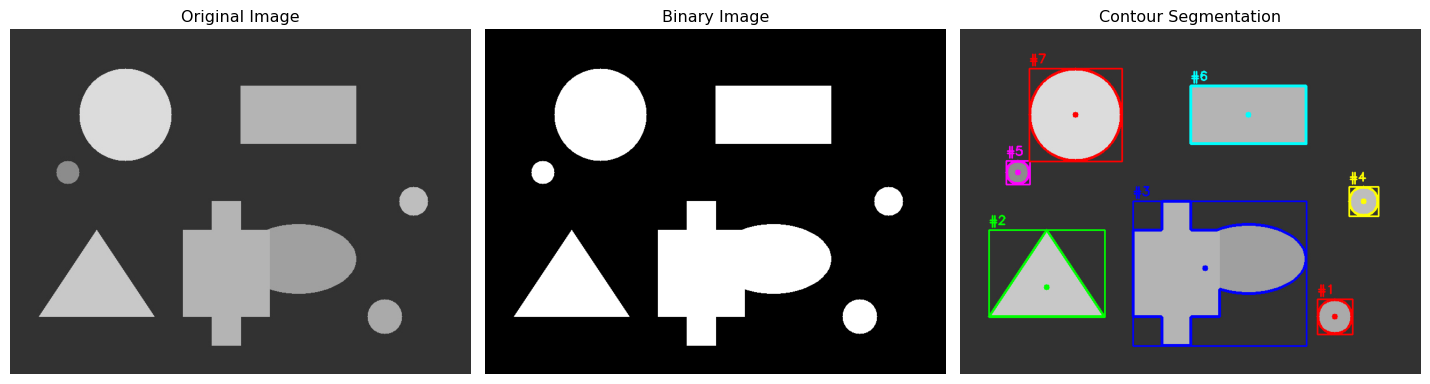

🔍 Contour Analysis Results:
--------------------------------------------------
Object #1:
  Area: 2736 pixels
  Perimeter: 197.8 pixels
  Center: (650, 500)
  Bounding box: (620, 470, 61, 61)

Object #2:
  Area: 15000 pixels
  Perimeter: 582.8 pixels
  Center: (150, 449)
  Bounding box: (50, 350, 201, 151)

Object #3:
  Area: 42662 pixels
  Perimeter: 1073.3 pixels
  Center: (425, 416)
  Bounding box: (300, 300, 301, 251)

Object #4:
  Area: 1890 pixels
  Perimeter: 164.9 pixels
  Center: (700, 300)
  Bounding box: (675, 275, 51, 51)

Object #5:
  Area: 1200 pixels
  Perimeter: 131.9 pixels
  Center: (100, 250)
  Bounding box: (80, 230, 41, 41)

Object #6:
  Area: 20000 pixels
  Perimeter: 600.0 pixels
  Center: (500, 150)
  Bounding box: (400, 100, 201, 101)

Object #7:
  Area: 19854 pixels
  Perimeter: 529.9 pixels
  Center: (200, 150)
  Bounding box: (120, 70, 161, 161)



In [6]:
#| eval: true
def contour_segmentation(image):
    """Find and analyze contours for segmentation"""
    
    # Convert to grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image
    
    # Apply threshold
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create result image
    result = image.copy() if len(image.shape) == 3 else cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    
    # Analyze each contour
    contour_info = []
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255), (0, 255, 255)]
    
    for i, contour in enumerate(contours):
        # Calculate contour properties
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        
        # Filter small contours (noise)
        if area > 500:  # Minimum area threshold
            # Get bounding rectangle
            x, y, w, h = cv2.boundingRect(contour)
            
            # Get center
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
            else:
                cx, cy = 0, 0
            
            # Draw contour and info
            color = colors[i % len(colors)]
            cv2.drawContours(result, [contour], -1, color, 3)
            cv2.rectangle(result, (x, y), (x + w, y + h), color, 2)
            cv2.circle(result, (cx, cy), 5, color, -1)
            
            # Add text
            cv2.putText(result, f"#{i+1}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
            
            contour_info.append({
                'id': i+1,
                'area': area,
                'perimeter': perimeter,
                'center': (cx, cy),
                'bounding_box': (x, y, w, h)
            })
    
    return binary, result, contour_info

# Apply contour segmentation
binary_contours, contour_result, contour_info = contour_segmentation(img_rgb)

# Display results
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_contours, cmap='gray')
plt.title("Binary Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(contour_result)
plt.title("Contour Segmentation")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print contour analysis
print("🔍 Contour Analysis Results:")
print("-" * 50)
for info in contour_info:
    print(f"Object #{info['id']}:")
    print(f"  Area: {info['area']:.0f} pixels")
    print(f"  Perimeter: {info['perimeter']:.1f} pixels")
    print(f"  Center: {info['center']}")
    print(f"  Bounding box: {info['bounding_box']}")
    print()

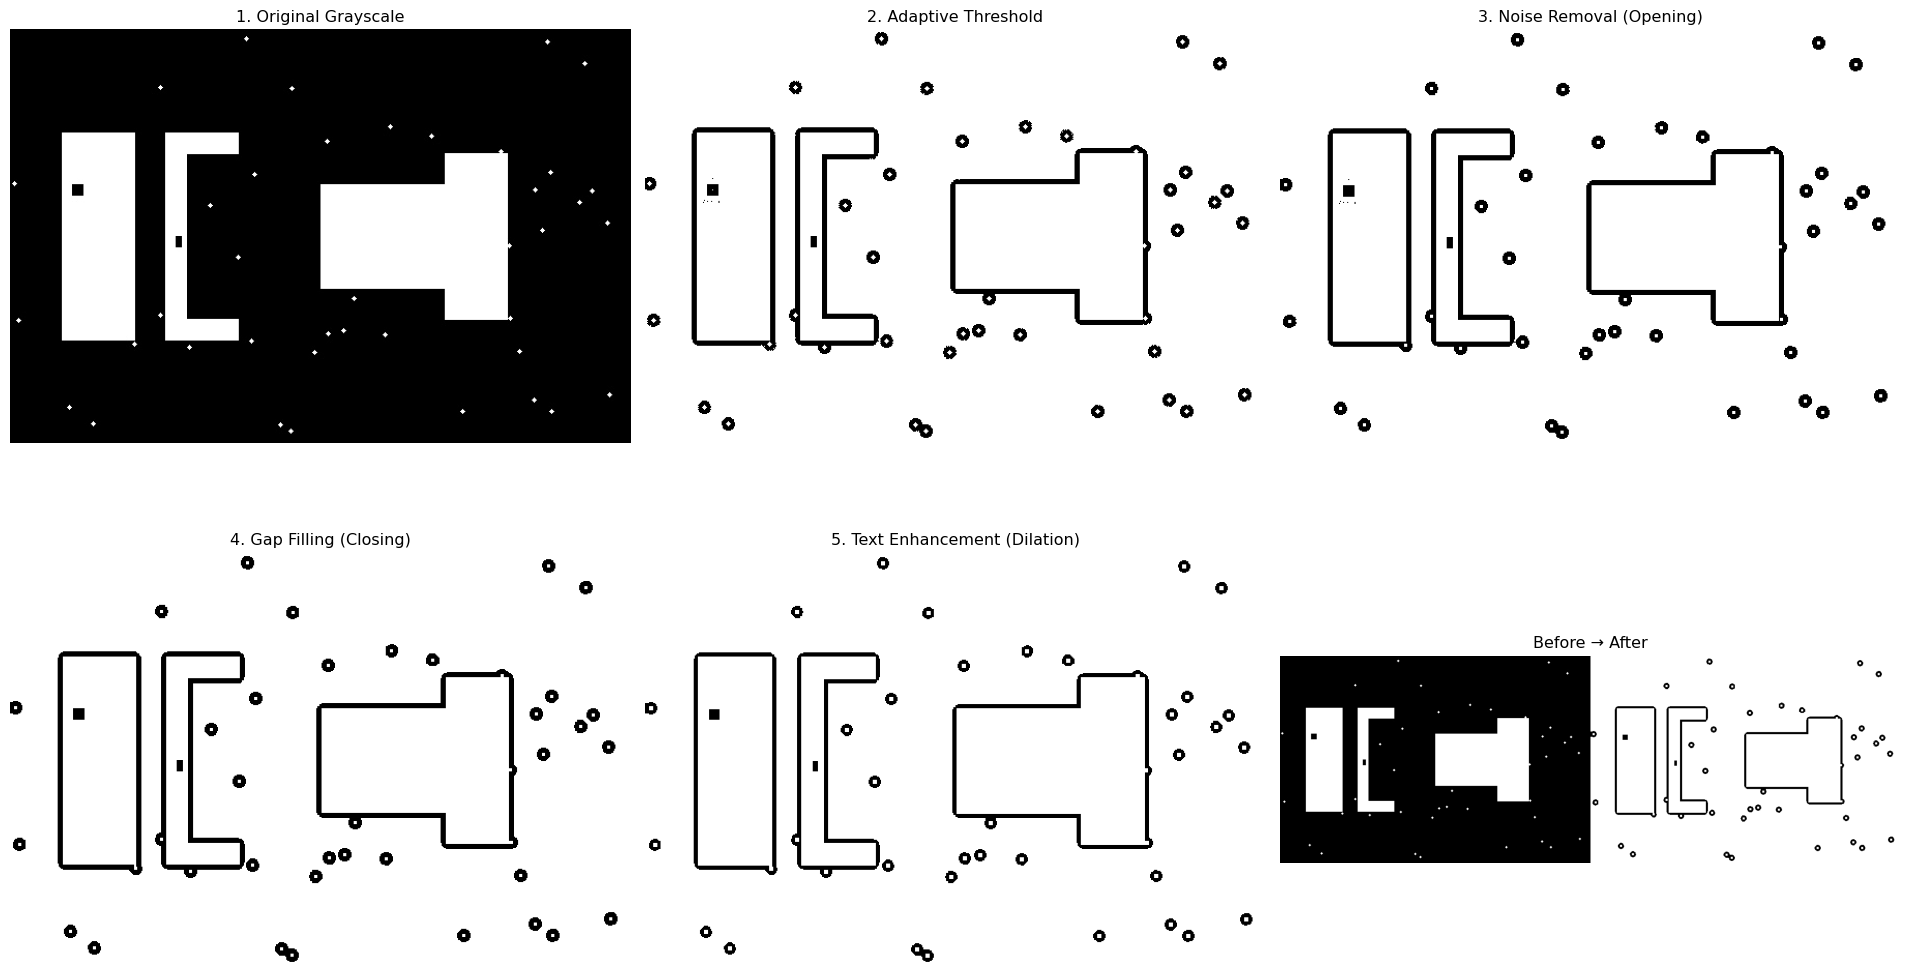

📄 Document Cleaning Pipeline:
✅ Adaptive thresholding handles varying lighting
✅ Opening removes small noise pixels
✅ Closing fills gaps in letters
✅ Dilation strengthens text strokes
🎯 Result: Clean, readable text!


In [7]:
#| eval: true
def document_cleaning_pipeline(image):
    """Complete pipeline for cleaning scanned documents"""
    
    # Step 1: Convert to grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image
    
    # Step 2: Apply adaptive thresholding
    binary = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )
    
    # Step 3: Remove noise with opening
    kernel_noise = np.ones((2, 2), np.uint8)
    denoised = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel_noise)
    
    # Step 4: Fill gaps in text with closing
    kernel_fill = np.ones((3, 3), np.uint8)
    filled = cv2.morphologyEx(denoised, cv2.MORPH_CLOSE, kernel_fill)
    
    # Step 5: Enhance text with dilation
    kernel_enhance = np.ones((2, 2), np.uint8)
    enhanced = cv2.dilate(filled, kernel_enhance, iterations=1)
    
    return gray, binary, denoised, filled, enhanced

# Apply document cleaning to our morphological demo
gray_doc, binary_doc, denoised_doc, filled_doc, enhanced_doc = document_cleaning_pipeline(morph_img)

# Display the cleaning pipeline
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.imshow(gray_doc, cmap='gray')
plt.title("1. Original Grayscale")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(binary_doc, cmap='gray')
plt.title("2. Adaptive Threshold")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(denoised_doc, cmap='gray')
plt.title("3. Noise Removal (Opening)")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(filled_doc, cmap='gray')
plt.title("4. Gap Filling (Closing)")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(enhanced_doc, cmap='gray')
plt.title("5. Text Enhancement (Dilation)")
plt.axis('off')

# Show before/after comparison
plt.subplot(2, 3, 6)
comparison = np.hstack([gray_doc, enhanced_doc])
plt.imshow(comparison, cmap='gray')
plt.title("Before → After")
plt.axis('off')

plt.tight_layout()
plt.show()

print("📄 Document Cleaning Pipeline:")
print("✅ Adaptive thresholding handles varying lighting")
print("✅ Opening removes small noise pixels")
print("✅ Closing fills gaps in letters")
print("✅ Dilation strengthens text strokes")
print("🎯 Result: Clean, readable text!")

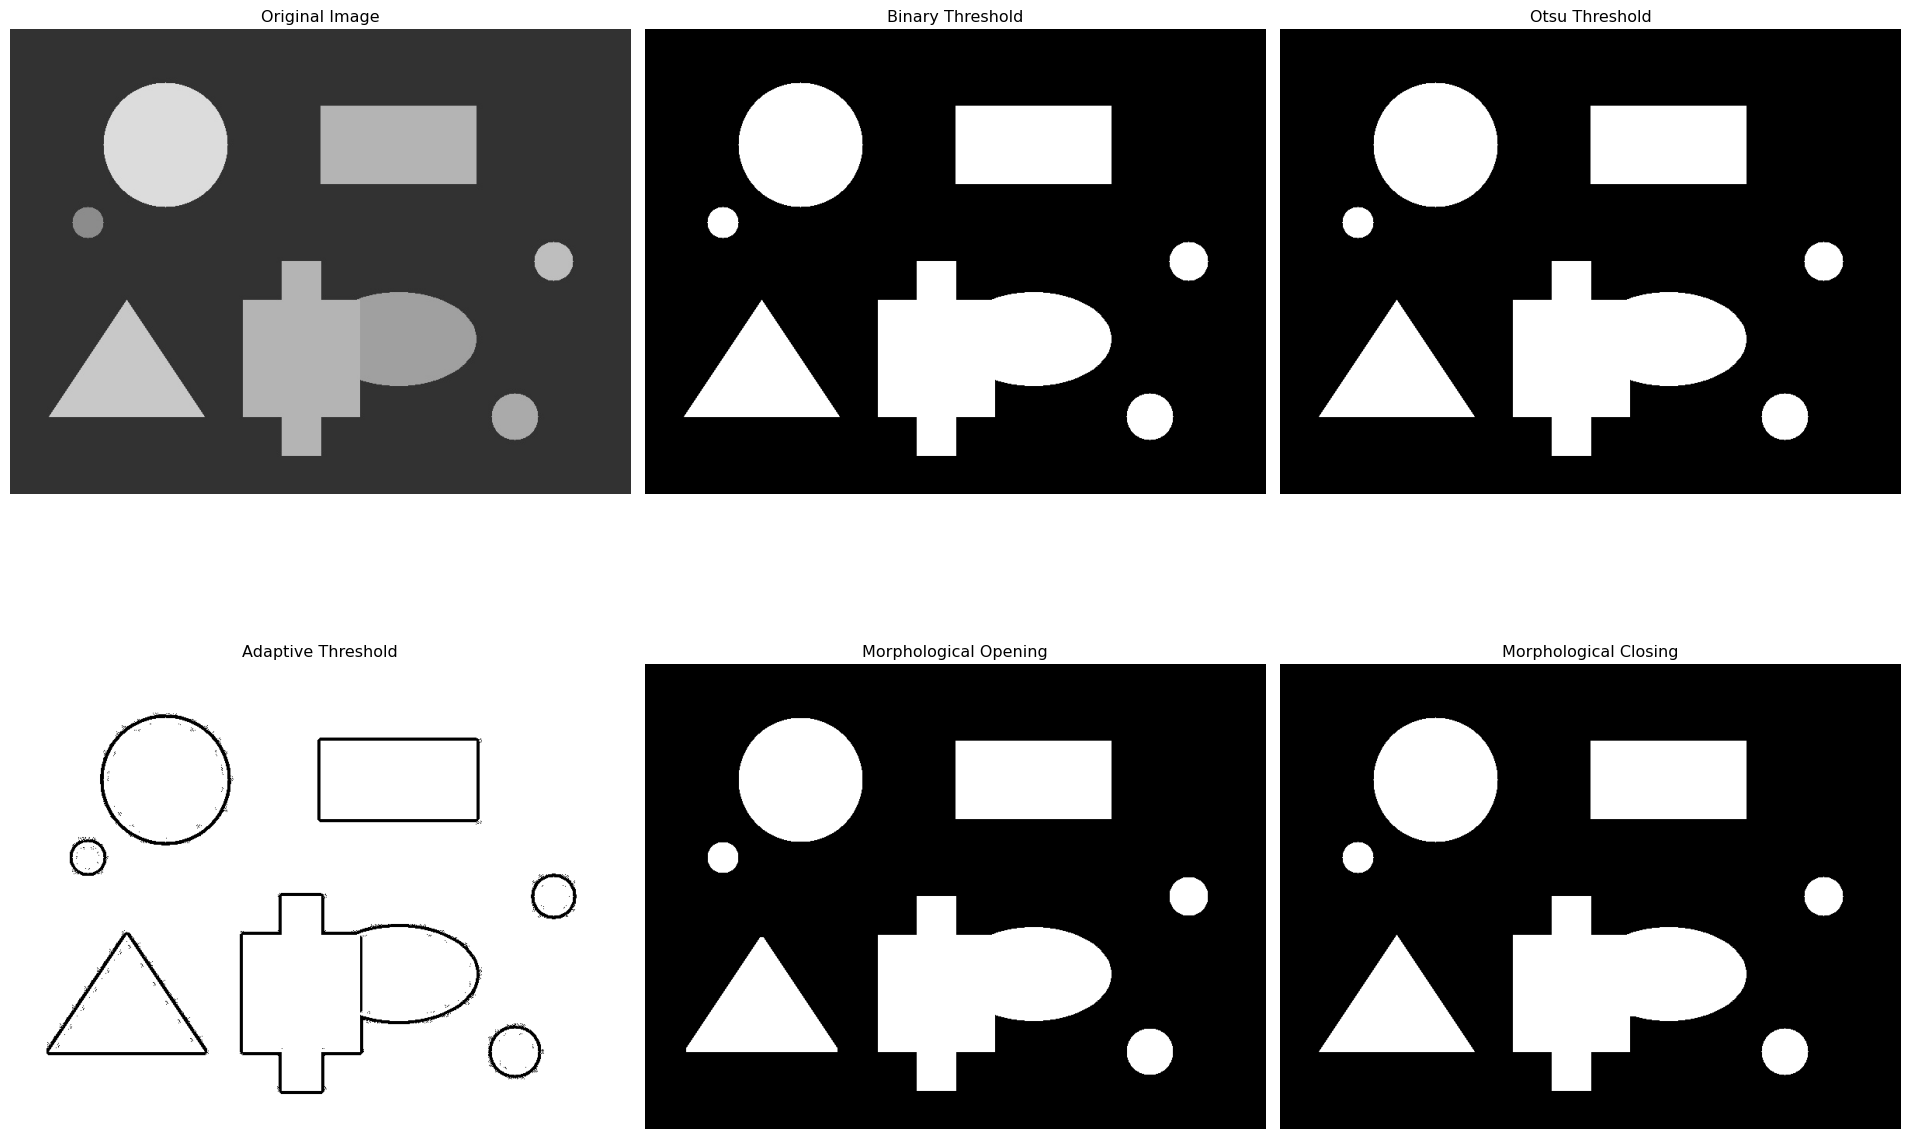

🎯 Technique Comparison:
- Binary: Simple but effective for uniform lighting
- Otsu: Automatically finds optimal threshold
- Adaptive: Handles varying lighting conditions
- Opening: Removes noise while preserving object shape
- Closing: Fills gaps and connects broken parts


In [8]:
#| eval: true
def compare_segmentation_techniques(image):
    """Compare multiple segmentation techniques on the same image"""
    
    # Convert to grayscale
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image
    
    techniques = {}
    
    # 1. Simple thresholding
    _, techniques['Binary Threshold'] = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # 2. Otsu's thresholding
    _, techniques['Otsu Threshold'] = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # 3. Adaptive thresholding
    techniques['Adaptive Threshold'] = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )
    
    # 4. Morphological opening
    kernel = np.ones((5, 5), np.uint8)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    techniques['Morphological Opening'] = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    
    # 5. Morphological closing
    techniques['Morphological Closing'] = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    return techniques

# Compare techniques on our demo image
techniques = compare_segmentation_techniques(img_rgb)

# Display comparison
plt.figure(figsize=(20, 15))

plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

for i, (name, result) in enumerate(techniques.items(), 2):
    plt.subplot(2, 3, i)
    plt.imshow(result, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()

print("🎯 Technique Comparison:")
print("- Binary: Simple but effective for uniform lighting")
print("- Otsu: Automatically finds optimal threshold")
print("- Adaptive: Handles varying lighting conditions")
print("- Opening: Removes noise while preserving object shape")
print("- Closing: Fills gaps and connects broken parts")

🏥 Medical Image Segmentation Analysis:

THRESHOLD TECHNIQUE:
  Objects detected: 7
  Total area: 104849 pixels
  Average area: 14978.4 pixels
  Largest area: 43177 pixels

MORPHOLOGICAL TECHNIQUE:
  Objects detected: 7
  Total area: 104810 pixels
  Average area: 14972.9 pixels
  Largest area: 43177 pixels

WATERSHED TECHNIQUE:
  Objects detected: 3
  Total area: 4742 pixels
  Average area: 1580.7 pixels
  Largest area: 2375 pixels

CONTOUR TECHNIQUE:
  Objects detected: 7
  Total area: 104849 pixels
  Average area: 14978.4 pixels
  Largest area: 43177 pixels


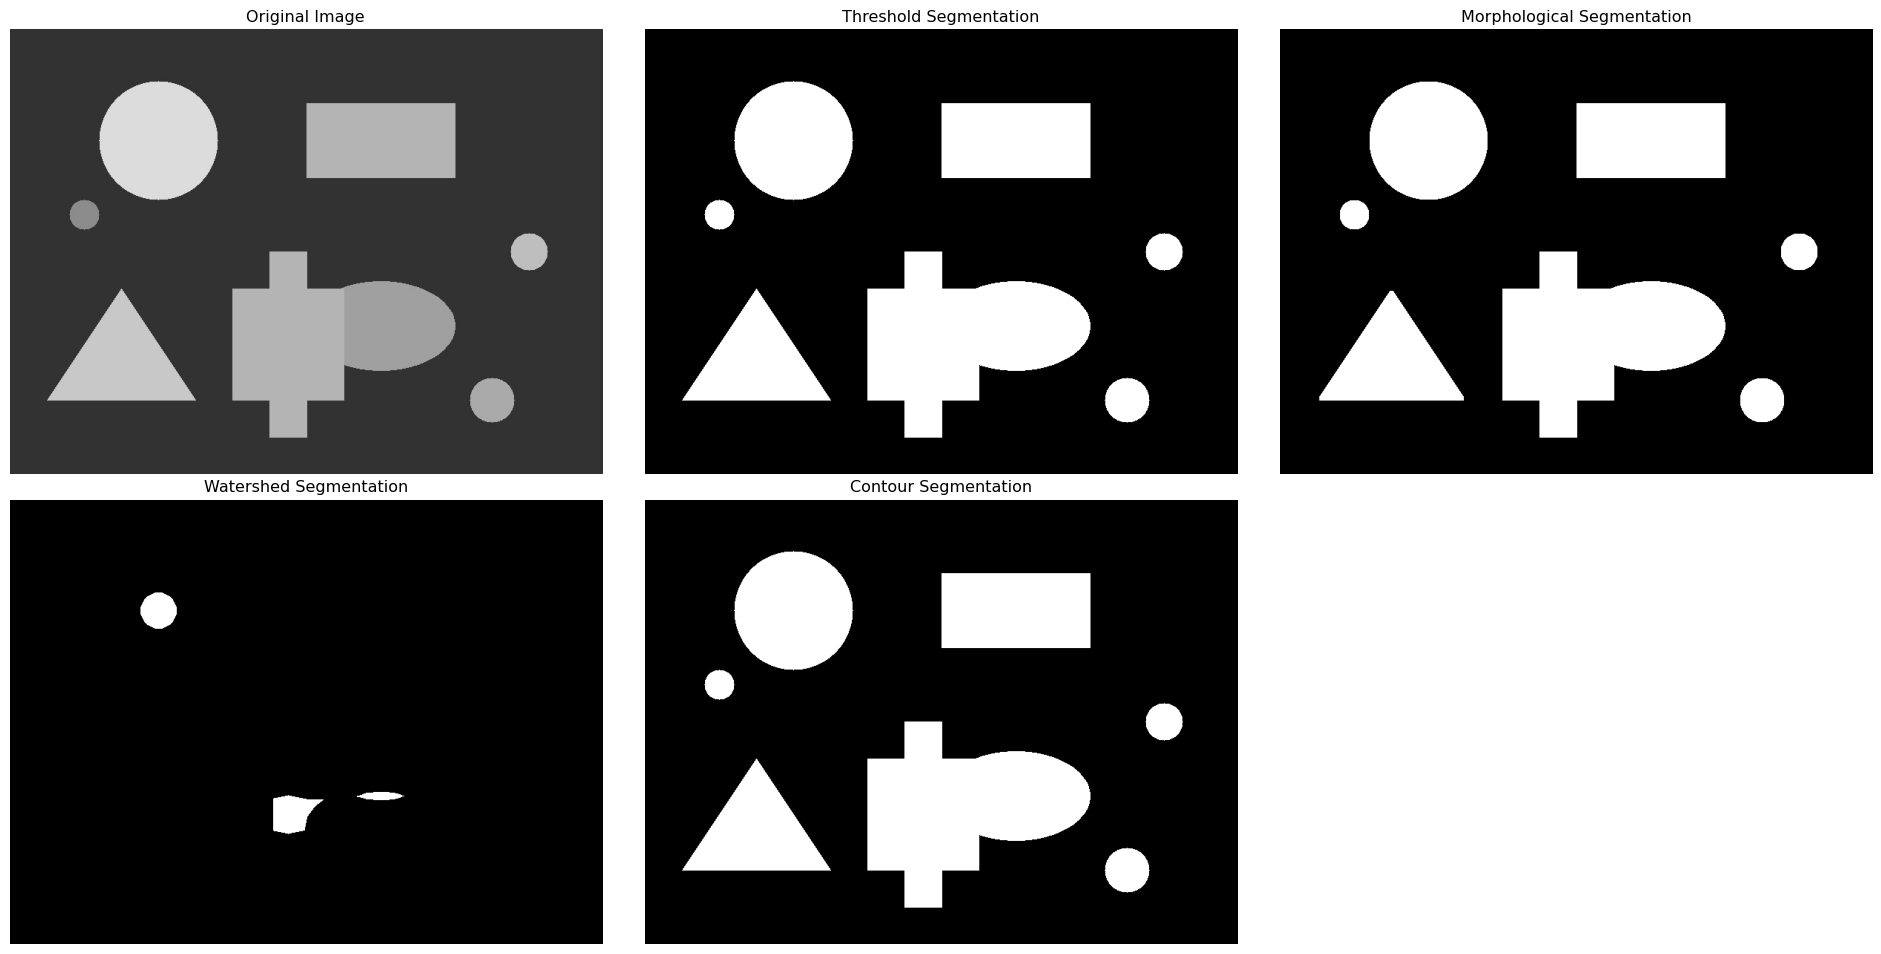


💡 Challenge: Try this framework on medical images!
- X-rays: Segment bones from soft tissue
- MRI scans: Identify different brain regions
- Cell images: Count and measure individual cells


In [9]:
#| eval: true
class MedicalImageSegmenter:
    def __init__(self):
        self.techniques = {
            'threshold': self.threshold_segment,
            'morphological': self.morphological_segment,
            'watershed': self.watershed_segment,
            'contour': self.contour_segment
        }
    
    def threshold_segment(self, image, method='otsu'):
        """Apply thresholding segmentation"""
        if len(image.shape) == 3:
            gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        else:
            gray = image
            
        if method == 'otsu':
            _, result = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        elif method == 'adaptive':
            result = cv2.adaptiveThreshold(
                gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
            )
        else:
            _, result = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
        
        return result
    
    def morphological_segment(self, image, operation='opening', kernel_size=5):
        """Apply morphological operations"""
        # First get binary image
        binary = self.threshold_segment(image, 'otsu')
        
        # Apply morphological operation
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
        
        if operation == 'opening':
            result = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
        elif operation == 'closing':
            result = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
        elif operation == 'gradient':
            result = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, kernel)
        else:
            result = binary
            
        return result
    
    def watershed_segment(self, image):
        """Apply watershed segmentation"""
        # This is a simplified version
        if len(image.shape) == 3:
            gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        else:
            gray = image
            
        # Apply threshold
        _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # Distance transform
        dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
        
        # Find local maxima
        _, markers = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
        
        return markers.astype(np.uint8)
    
    def contour_segment(self, image, min_area=100):
        """Segment using contours"""
        binary = self.threshold_segment(image, 'otsu')
        
        # Find contours
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Create result image
        result = np.zeros_like(binary)
        
        # Draw significant contours
        for contour in contours:
            if cv2.contourArea(contour) > min_area:
                cv2.drawContours(result, [contour], -1, 255, -1)
        
        return result
    
    def analyze_segments(self, segmented_image):
        """Analyze segmented regions"""
        # Find connected components
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(segmented_image)
        
        analysis = {
            'num_objects': num_labels - 1,  # Subtract background
            'total_area': np.sum(stats[1:, cv2.CC_STAT_AREA]),  # Exclude background
            'average_area': np.mean(stats[1:, cv2.CC_STAT_AREA]) if num_labels > 1 else 0,
            'largest_area': np.max(stats[1:, cv2.CC_STAT_AREA]) if num_labels > 1 else 0
        }
        
        return analysis

# Example usage
segmenter = MedicalImageSegmenter()

# Apply different techniques to our demo image
results = {}
for name, method in segmenter.techniques.items():
    if name == 'morphological':
        results[name] = method(img_rgb, 'opening')
    else:
        results[name] = method(img_rgb)

# Analyze results
print("🏥 Medical Image Segmentation Analysis:")
print("=" * 50)

for name, result in results.items():
    analysis = segmenter.analyze_segments(result)
    print(f"\n{name.upper()} TECHNIQUE:")
    print(f"  Objects detected: {analysis['num_objects']}")
    print(f"  Total area: {analysis['total_area']} pixels")
    print(f"  Average area: {analysis['average_area']:.1f} pixels")
    print(f"  Largest area: {analysis['largest_area']} pixels")

# Visualize results
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

for i, (name, result) in enumerate(results.items(), 2):
    plt.subplot(2, 3, i)
    plt.imshow(result, cmap='gray')
    plt.title(f"{name.title()} Segmentation")
    plt.axis('off')

plt.tight_layout()
plt.show()

print("\n💡 Challenge: Try this framework on medical images!")
print("- X-rays: Segment bones from soft tissue")
print("- MRI scans: Identify different brain regions")
print("- Cell images: Count and measure individual cells")